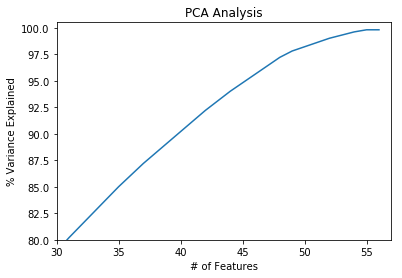

In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score



def read_data():
    data = pd.read_csv("dataset.txt", delimiter=',')
    features = data.iloc[:, :57].values
    target = data.iloc[:, 57:].values
    # normalize the data
    features = StandardScaler().fit_transform(features)
    return features, target

features, target = read_data()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

pca = PCA(n_components=57, svd_solver='full')
pca.fit(x_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,100.5)
plt.xlim(30, 57)
plt.style.context('seaborn-whitegrid')


plt.plot(var) 

# PCA Analysis
As you can see here in the PCA Analysis plot, it can be shown that proportion of variance starts to become 80% after 31 examples and converges to 100% at 53 examples. Which means that there is no reason to use more than 53 examples for this example.

In [233]:
print("Case 1")
classifier = KNeighborsClassifier(n_jobs=-1,n_neighbors=5,weights='uniform')  
classifier.fit(x_train, y_train.ravel()) 
y_pred = classifier.predict(x_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Case 1
[[1308   87]
 [ 127  778]]
             precision    recall  f1-score   support

          0       0.91      0.94      0.92      1395
          1       0.90      0.86      0.88       905

avg / total       0.91      0.91      0.91      2300



In [234]:
# Feature extraction: Use PCA to reduce dimensionality to m, followed by k-NN. Try for different values of
# m corresponding to proportion of variance of 0.80, 0.81, 0.82, ...., 0.99. Plot the data for m=2.
print("Case 2")
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

def pcaknn(n_component):


    pca = PCA(n_components=n_component)
    X_train_transformed = pca.fit_transform(x_train)
    X_submission_transformed = pca.transform(x_test)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_transformed, y_train, test_size=0.5, random_state=13)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca[:,:n_component], y_train_pca.ravel())

    predict_labels = knn.predict(X_submission_transformed[:, :n_component])

    print(confusion_matrix(y_test, predict_labels))  
    print(classification_report(y_test, predict_labels)) 
    print("Accuracy: ", accuracy_score(y_test, predict_labels))
    
    plt.figure(figsize = (8,8))
    plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1], s=20, c = y_test.ravel(), cmap = "rainbow", edgecolor = "None")
    plt.colorbar()
    plt.clim(0,1)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
#for x in range(30, 54):
#    print(x, "nth example:")
#    pcaknn(x)

Case 2


[[1259  152]
 [ 182  707]]
             precision    recall  f1-score   support

          0       0.87      0.89      0.88      1411
          1       0.82      0.80      0.81       889

avg / total       0.85      0.85      0.85      2300

Accuracy:  0.8547826086956521


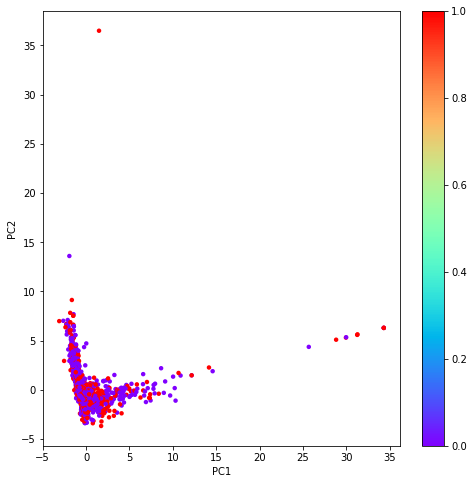

In [235]:
pcaknn(2)
pdf = pd.DataFrame(X_submission_transformed)
principalDf = pd.DataFrame(data = X_train_transformed
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pdf[:]], axis = 1)
